In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
x.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Normalize the variables to have mean=0 and sd=1
# Solution is not driven by variables measured on differnt units
clusterdata=x.copy()
for i in range(clusterdata.shape[1]):
    clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i].astype('float64'))

In [4]:
clusterdata.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [5]:
# k-means cluster analysis for 1-9 clusters         
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clusterdata.shape[0])

In [6]:
cdist(clusterdata, model.cluster_centers_, 'euclidean')

array([[3.16848782, 0.15231503, 4.79149459, ..., 1.04729744, 4.97036568,
        1.18039266],
       [2.46597286, 1.08224925, 4.75925647, ..., 2.21443146, 5.36587708,
        0.26925766],
       [2.84218284, 0.74494096, 4.98913584, ..., 1.87451088, 5.42409757,
        0.38372721],
       ...,
       [2.14604484, 3.7289117 , 1.295671  , ..., 3.98200454, 2.27721785,
        3.89119308],
       [2.87517052, 3.75368603, 1.96296226, ..., 3.79154436, 1.94862466,
        4.11255395],
       [1.69850308, 3.24037551, 1.99634738, ..., 3.61549056, 2.82206099,
        3.32465892]])

In [7]:
clusterdata.shape[0]

150

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

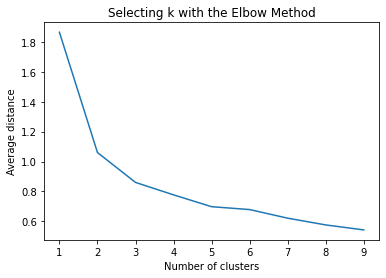

In [8]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [9]:
# K Means Cluster choosing 3 as the number of clusters
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K-Means Classification')

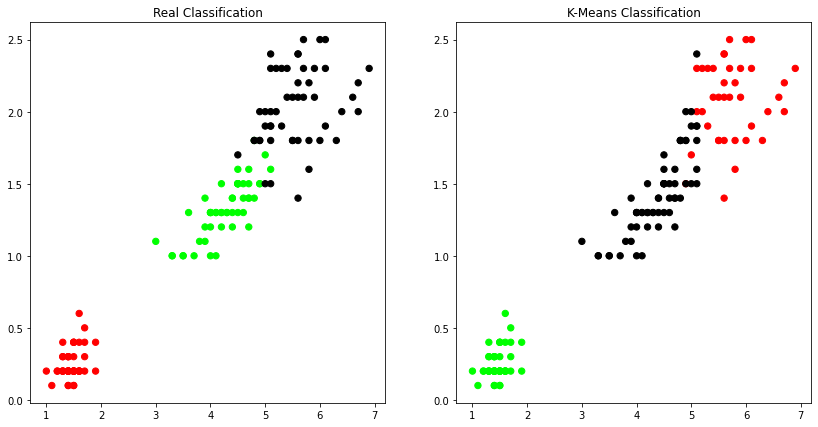

In [10]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width,c=colormap[model.labels_], s=40)
plt.title('K-Means Classification')

In [11]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [12]:
# convert the labels to align between the two methods
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

Text(0.5, 1.0, 'K Mean Classification')

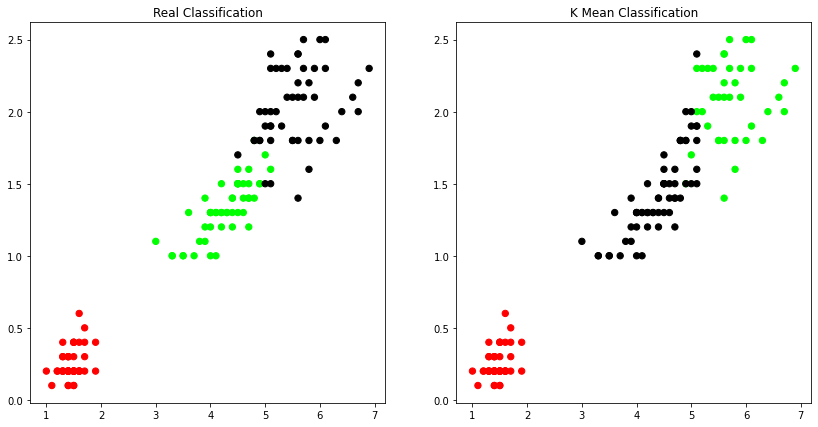

In [13]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [14]:
# Performance Measures
import sklearn.metrics
sklearn.metrics.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

In [15]:
sklearn.metrics.accuracy_score(y, predY)

0.44

In [16]:
#Hierarchical Clustering
#apply the complete linkage agglomeration to our clusters using
#the linkage function from SciPy's cluster.hierarchy submodule
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(x.values,method='complete', metric='euclidean')

In [17]:
from scipy.cluster.hierarchy import dendrogram

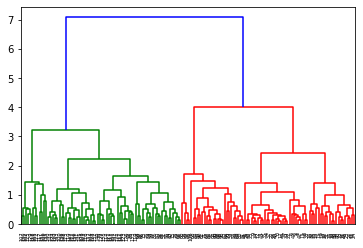

In [18]:
row_dendr = dendrogram(row_clusters)

In [19]:
#Applying agglomerative clustering via scikit-learn
from sklearn.cluster import AgglomerativeClustering

In [22]:
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [23]:
labels = ac.fit_predict(x.values)

In [24]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])